In [1]:
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline 
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


In [2]:
##Reading data
train=pd.read_csv("train_data.csv")
test=pd.read_csv("test_data.csv")

In [7]:
##Save Original Data
train_original=train.copy()
test_original=test.copy()

In [5]:
#Check the futures(Columns)
train.columns

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
# Print data types for each variable
train.dtypes

# shape of the dataset.
train.shape, test.shape

((614, 13), (367, 12))

In [8]:
#Frequency table of a variable will give us the count of each category in that variable.

train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [9]:
# Normalize can be set to True to print proportions instead of number 
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

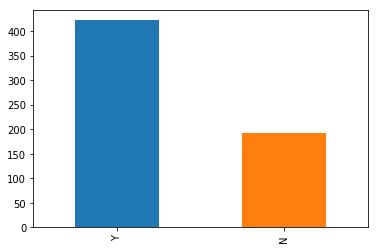

In [10]:
train['Loan_Status'].value_counts().plot.bar()

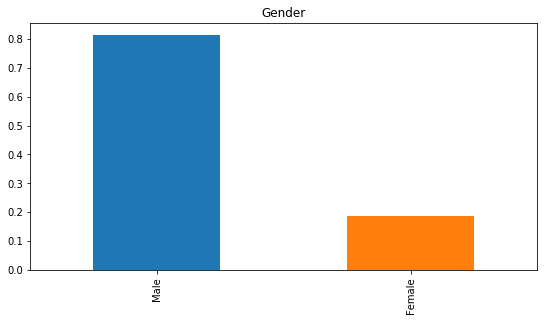

In [11]:
#Independent Variable (Categorical)
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

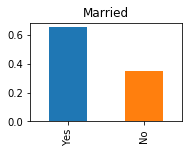

In [12]:
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

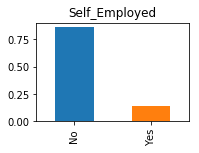

In [13]:
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed')

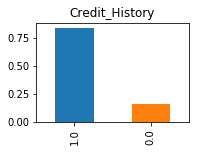

In [14]:
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')
plt.show()

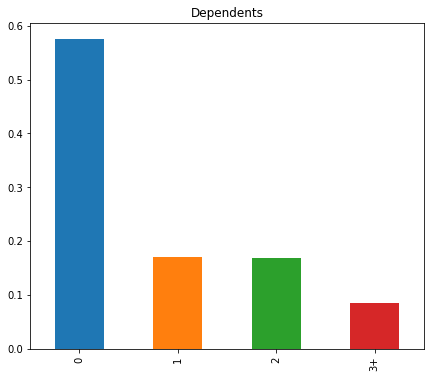

In [15]:
#Independent Variable (Original)
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents')

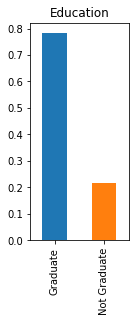

In [16]:

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

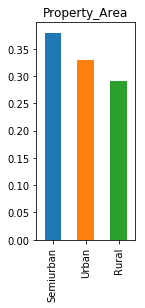

In [17]:

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.show()

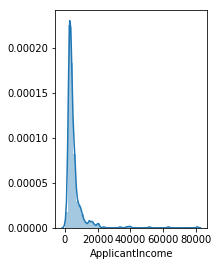

In [18]:
#Independent Variable (Numerical)
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

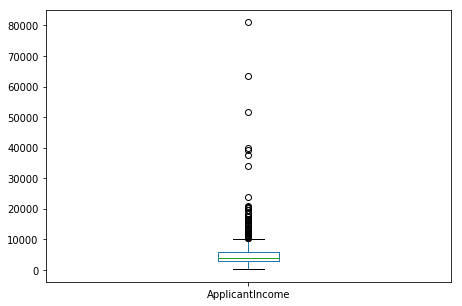

In [19]:
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

NameError: name 'Text' is not defined

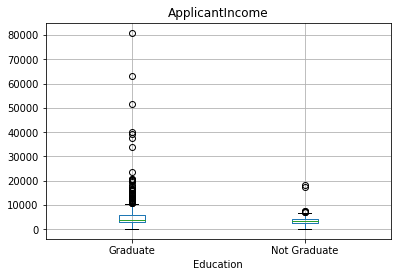

In [20]:
train.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")
Text(0.5,0.98,'')

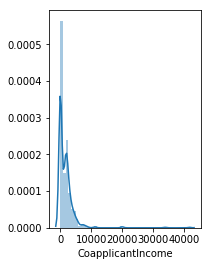

In [21]:
#look at the Coapplicant income distribution.
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome']);

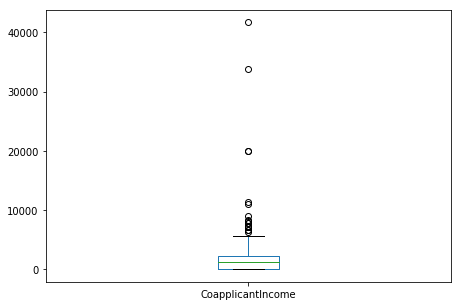

In [22]:
plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

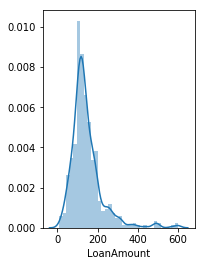

In [23]:
#look at the distribution of LoanAmount variable.
plt.figure(1)
plt.subplot(121)
df=train.dropna()
sns.distplot(df['LoanAmount']);

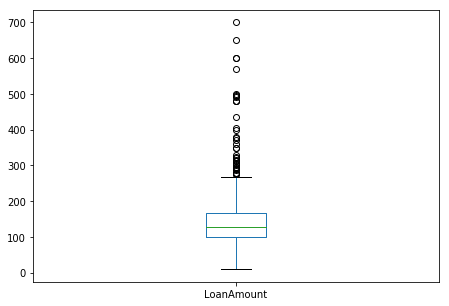

In [24]:

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

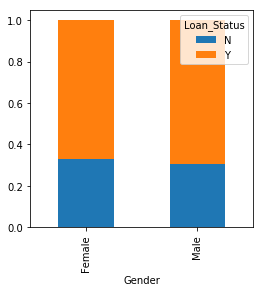

In [25]:
#Bivariate

Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [26]:
# visualize the remaining categorical variables vs target variable.

Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])

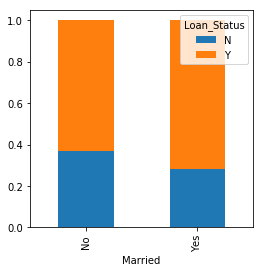

In [27]:
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

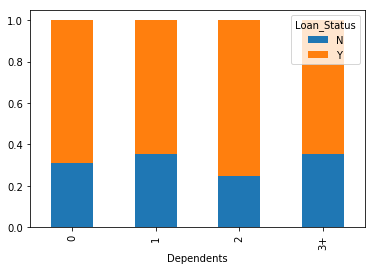

In [28]:
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

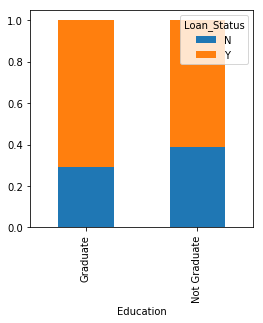

In [29]:
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

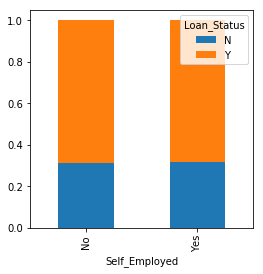

In [30]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

In [31]:
#look at the relationship between remaining categorical independent variables and Loan_Status.

Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])

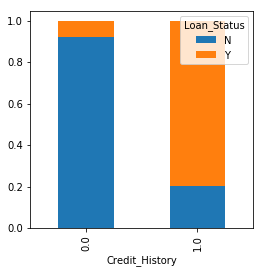

In [32]:
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()

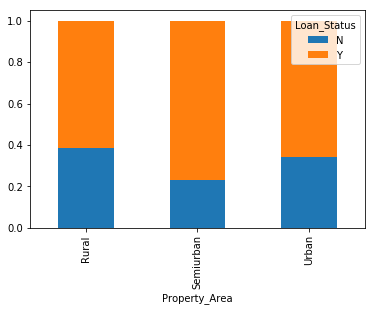

In [33]:
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.show()

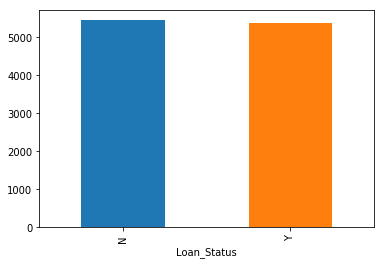

In [35]:
#Numerical Independent Variable vs Target Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [36]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

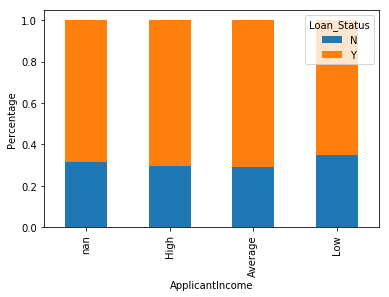

In [37]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

In [38]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

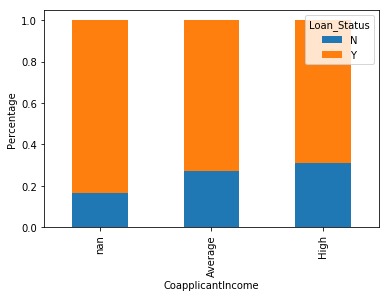

In [39]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

In [40]:

#combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

In [41]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)

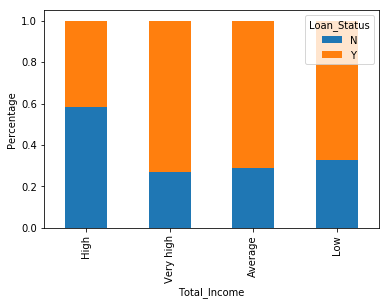

In [42]:
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

In [43]:
#visualize the Loan amount variable.
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

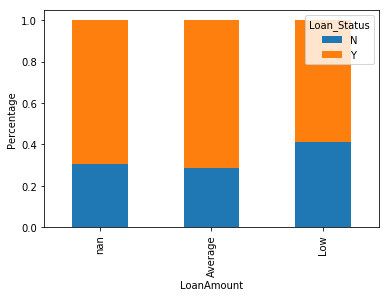

In [44]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [45]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

train['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True)
train['Loan_Status'].replace('Y', 1,inplace=True)

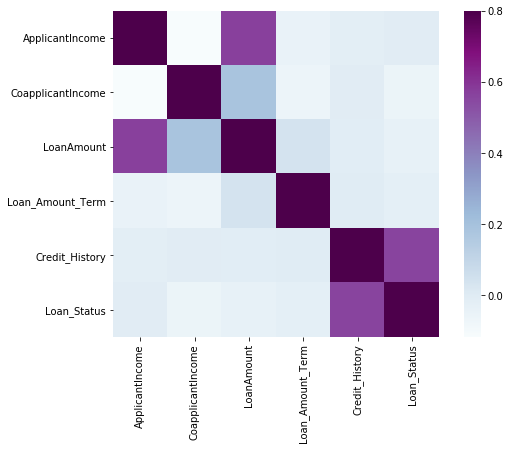

In [46]:
matrix = train.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [47]:
#Missing value imputation
#list out feature-wise count of missing values.
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
#treat the missing values in all the features one by one.

train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)

In [49]:
#find a way to fill the missing values in Loan_Amount_Term
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [50]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)

In [51]:
#future scaling
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [52]:
#check whether all the missing values are filled in the dataset
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
#fill all the missing values in the test dataset too with the same approach
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

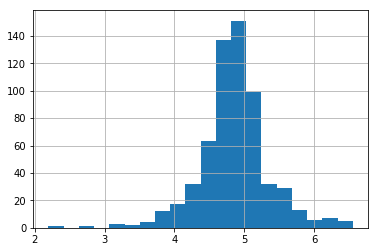

In [54]:
#visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [55]:
#MODELLING

#drop the Loan_ID variable as it do not have any effect on the loan status. 
train=train.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [56]:
#drop our target variable from the train dataset and save it in another dataset.
X = train.drop('Loan_Status',1)
y = train.Loan_Status

In [57]:

X=pd.get_dummies(X)
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [58]:
#train_test_split function
from sklearn.model_selection import train_test_split

In [59]:

x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size =0.3)

In [60]:
#import LogisticRegression and accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [61]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [62]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [63]:
#predict the Loan_Status for validation set and calculate its accuracy.

pred_cv = model.predict(x_cv)

In [64]:
#calculate how accurate our predictions are by calculating the accuracy.
accuracy_score(y_cv,pred_cv)

0.8162162162162162

In [65]:
#make predictions for the test dataset.
pred_test = model.predict(test)